# Agglomerative and Divisive Clustering - Airline Safety Records
### Liam Caulfield
#### April 30, 2023

***Using the Aviation Safety Network dataset provided from Kaggle, complete the following:***
1. Use this dataset and two different clustering approaches (agglomerative and divisive) to group the airlines with similar safety records.

2. Do these two approaches lead to the same/similar results? Provide appropriate visualizations, clustering summaries, and your interpretations.

***Sources:***
1. https://github.com/Nilothpal-Pillai/Phylogenetic-Tree-construction-using-Agglomerative-and-Divisive-Hierarchical-clustering/blob/master/Clusterer2.py
2. https://id.analyticsvidhya.com/auth/social/?next=https%3A%2F%2Fwww.analyticsvidhya.com%2Fblog%2F2019%2F05%2Fbeginners-guide-hierarchical-clustering%2F%3F

In [42]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster import hierarchy
import warnings
warnings.filterwarnings('ignore')

#### Agglomerative approach

In [45]:
# import dataset
df = pd.read_csv('airline-safety.csv')

In [46]:
# set airline as index for clustering based on safety records
df.set_index('airline', inplace = True)

In [47]:
# drop unnecessary columns
df.drop(columns=['avail_seat_km_per_week'], inplace=True)

In [48]:
# imputate the mean to fill nan values
df = df.fillna(df.mean())

In [49]:
#standardize the df
scaler = StandardScaler()
df_norm = scaler.fit_transform(df)

In [50]:
# write agglomerative clustering technique and create labels
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = agg.fit_predict(df_norm)

In [51]:
df['cluster'] = labels

In [52]:
# print initial value counts of clusters
print(df['cluster'].value_counts())

0    43
1    12
2     1
Name: cluster, dtype: int64


In [53]:
silhouette_avg = silhouette_score(df_norm, labels)
print('Silhouette score:', silhouette_avg)

Silhouette score: 0.46019199956252205


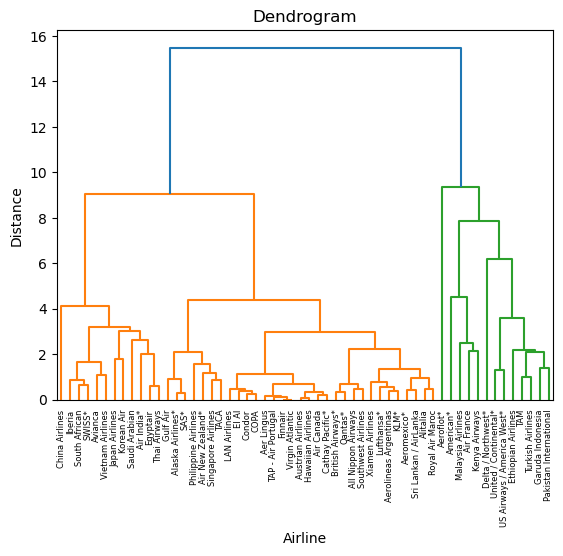

In [54]:
# print the dendogram created
sch.dendrogram(sch.linkage(df_norm, method='ward'), labels=df.index, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Airline')
plt.ylabel('Distance')
plt.show()

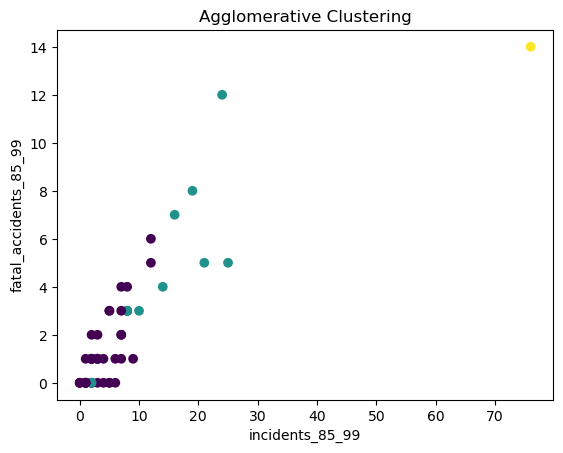

In [55]:
# scatter plot based on incidents between 1985 and 1999
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()

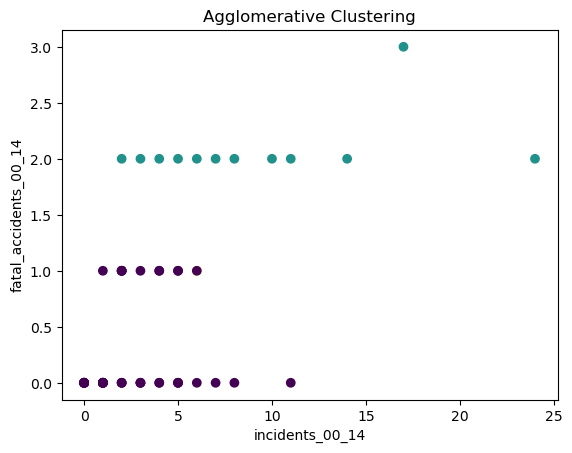

In [56]:
# scatter plot based on incidents between 2000 and 2014
plt.scatter(df.iloc[:, 3], df.iloc[:, 4], c=labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel(df.columns[3])
plt.ylabel(df.columns[4])
plt.show()

In [155]:
# Set threshold based on this dendogram
threshold = 4
clusters = hierarchy.fcluster(hierarchy.linkage(df_norm, method='ward'), t=threshold, criterion='distance')

In [156]:
silhouette_avg = silhouette_score(df_norm, clusters)
print('Silhouette score:', silhouette_avg)

Silhouette score: 0.3032856002724423


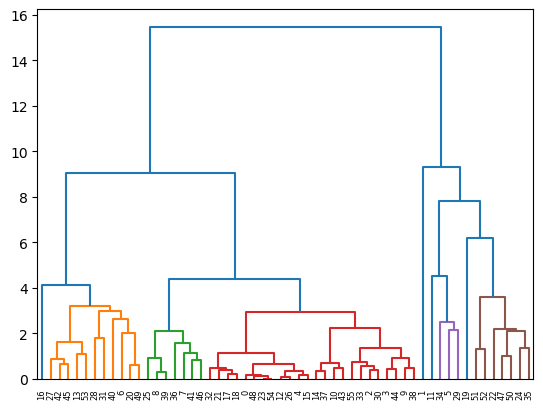

In [157]:
dendrogram = hierarchy.dendrogram(hierarchy.linkage(df_norm, method='ward'), color_threshold=threshold)
plt.show()

##### Findings Summary - Agglomerative 
Originally we set our number of clusters to 3 without a set threshold, the algorith, naturally broke the dendogram into a group of 43 airlines, 12 airlines, and 1 airline. The silhouette score was originally .46019 - indicating that the clusters are relatively well separated. We then iterated through the process to try to refine our methods - changing the threshold to 4 and 10, leading to the next highest silhouette score of .30328. Our original model performed better before our iterative process. 

Scatterplots and dendograms have been shown to illustrate the clustering of our dataset using the agglomerative approach. 

# Divisive approach

In [137]:
# create columns for divisive clustering technique
cols_for_clustering = df[['incidents_85_99', 'fatal_accidents_85_99', 'incidents_00_14', 'fatal_accidents_00_14']]

In [138]:
# create initial set of three clusters using KMeans
div_cluster = KMeans(n_clusters=3).fit(cols_for_clustering)
div_labels = div_cluster.labels_

In [139]:
# print initital value counts
print('Divisive Clustering:\n', pd.Series(div_labels).value_counts())

Divisive Clustering:
 2    49
0     6
1     1
dtype: int64


In [140]:
print('Divisive Clustering Silhouette Score:', silhouette_score(cols_for_clustering, div_labels))

Divisive Clustering Silhouette Score: 0.6566397535593318


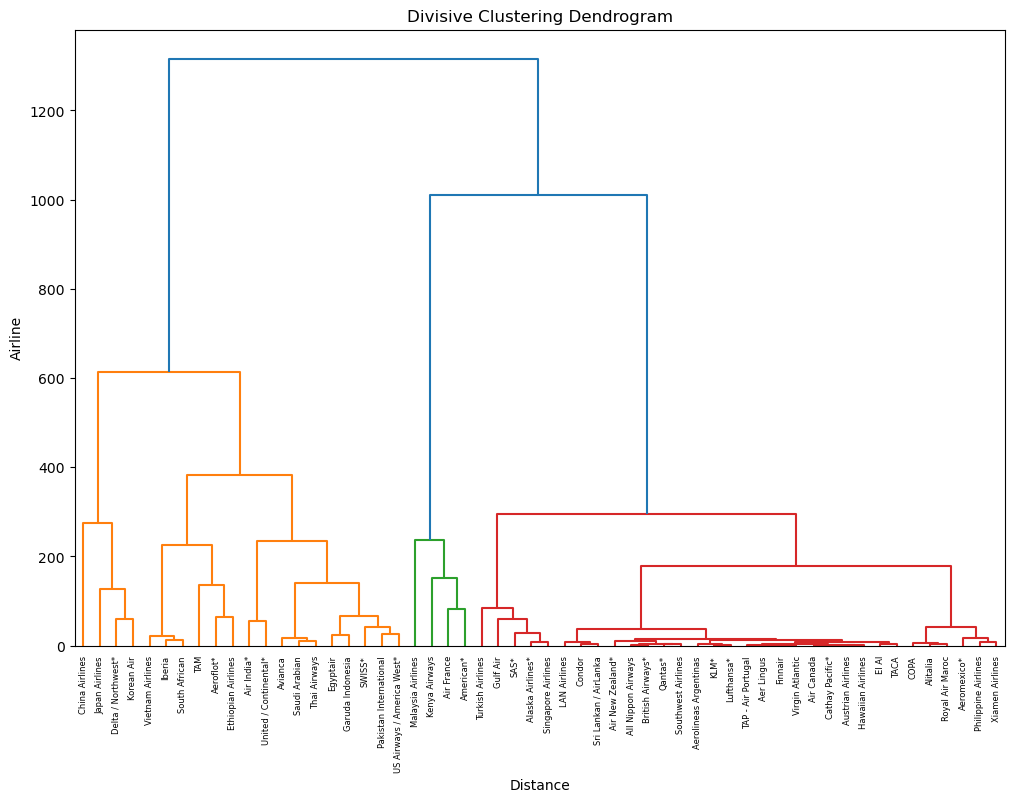

In [142]:
# print created dendogram of divisive clustering
plt.figure(figsize=(12, 8))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(df, method='ward'), labels=df.index)
plt.title('Divisive Clustering Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Airline')
plt.show()

In [147]:
# Set threshold based on this dendogram
threshold = 1000
clusters = hierarchy.fcluster(hierarchy.linkage(df, method='ward'), t=threshold, criterion='distance')

In [148]:
# check newly created 
print(pd.Series(clusters).value_counts())

3    32
1    20
2     4
dtype: int64


In [149]:
print('Divisive Clustering Silhouette Score:', silhouette_score(cols_for_clustering, clusters))

Divisive Clustering Silhouette Score: 0.15047334151210714


##### Findings Summary - Divisive Approach
Our original divisive approach created three clusters: one of 49, one of 6, and one of 1 airline. The intitial silhouette score was .656639 - higher than any found in the agglomerative process. We then reset the threshold and created clustering of 32, 20, and 4. However the silhouette score of this iterative process dropped to .15047 - meaning our original method was stronger than that produced during our iterative process. 

A dendogram has been provided to illustrate this clustering. 

##### Comparison
Overall, Agglomerative offers is advantages in flexiblility and ability to handle different types of data, while divisive clustering can be advantageous in situations where there is a known number of clusters. A disadvantage of agglomerative clustering is its time complexity, while divisive clustering can be more sensitive to large datasets and more difficult to implement. 

Our approaches showed that the two approaches did not produce the same results. Overall the divisive approach produced a greater silhouette score and the value counts of the two clustering techniques were quite different as illustrated in the findings summary of both techniques. For this specific problem, I believe the only advantage to the agg approach was the ability to locate the extreme outlier in the 85_99 variables and isolate it as its own outlier. Divisive approach was stron gin this case as well and overall, for this specific dataset, I would prefer divisive over agg clustering. 